In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Dans ce qui suit, on va se baser sur l'étude "début analyse" pour réindicer les colonnes et avoir un aperçu des données que l'on va étudier, notamment quelles sont les colonnes pertinentes en ce qui concerne les "habitudes de consommations des usagers".

In [2]:
df=pd.read_csv('dataset.zip',compression='zip', header=0, sep=';', quotechar='"',low_memory=False)
df.columns

Index(['POPULATION', 'NOIND', 'NUM_LIGNE', 'R24_num', 'R24_nombre', 'R24_pond',
       'occ_hdeb', 'occ_type', 'occ_lieu', 'occ_alim_libelle',
       ...
       'magnesium', 'phosphore', 'potassium', 'calcium', 'manganese', 'fer',
       'cuivre', 'zinc', 'selenium', 'iode'],
      dtype='object', length=109)

In [3]:
df.pop('POPULATION')
df=df.set_index('NUM_LIGNE')
df=df.sort_index()
df.head()

,NOIND,R24_num,R24_nombre,R24_pond,occ_hdeb,occ_type,occ_lieu,occ_alim_libelle,occ_alim_num,occ_alim_num_seq,...,magnesium,phosphore,potassium,calcium,manganese,fer,cuivre,zinc,selenium,iode
NUM_LIGNE,,,,,,,,,,,,,,,,,,,,,
3,110100101,1,3,1.0,11:00,4,1,eau,1,1,...,0.990000,0.000000,0.730000,7.130000,0.000820,0.030000,0.017000,0.011000,0.500000,0.000000
6,110100101,1,3,1.0,12:30,5,1,frites,1,1,...,23.300000,106.000000,684.000000,23.800000,0.160000,0.900000,0.120000,0.360000,1.100000,2.500000
7,110100101,1,3,1.0,12:30,5,1,frites,1,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,110100101,1,3,1.0,12:30,5,1,hamburger,2,1,...,27.572315,142.557068,211.638412,58.468925,0.343842,1.533333,0.106429,2.448926,15.196949,8.181355
14,110100101,1,3,1.0,12:30,5,1,poulet,3,2,...,23.000000,198.000000,247.000000,11.000000,0.018000,1.210000,0.084000,1.580000,12.400000,2.500000


In [4]:
print("Aperçu des données :")
print(df.head())
print("Résumé statistique des colonnes numériques :")
print(df.describe())
print("Information sur les types de données :")
print(df.info())

Aperçu des données :
               NOIND  R24_num  R24_nombre  R24_pond occ_hdeb  occ_type  \
NUM_LIGNE                                                                
3          110100101        1           3       1.0    11:00         4   
6          110100101        1           3       1.0    12:30         5   
7          110100101        1           3       1.0    12:30         5   
9          110100101        1           3       1.0    12:30         5   
14         110100101        1           3       1.0    12:30         5   

           occ_lieu occ_alim_libelle  occ_alim_num  occ_alim_num_seq  ...  \
NUM_LIGNE                                                             ...   
3                 1              eau             1                 1  ...   
6                 1           frites             1                 1  ...   
7                 1           frites             1                 2  ...   
9                 1        hamburger             2                 1  ...  

Il y a 107 colonnes,ce qui est beaucoup pour tout étudier, d'autant que certaines, qui contiennent des codes très précis pour chaque aliment ne sont pas pratiques, voir impossibles à utiliser. On va donc se concentrer en premier lieu sur les horaires et lieux de consommation : à quelle heure consomment les usagers de cette étude ? dans quel lieux ? Combien de repas par jour prennent-ils ?

1. <b>Horaires et lieux de consommation</b>

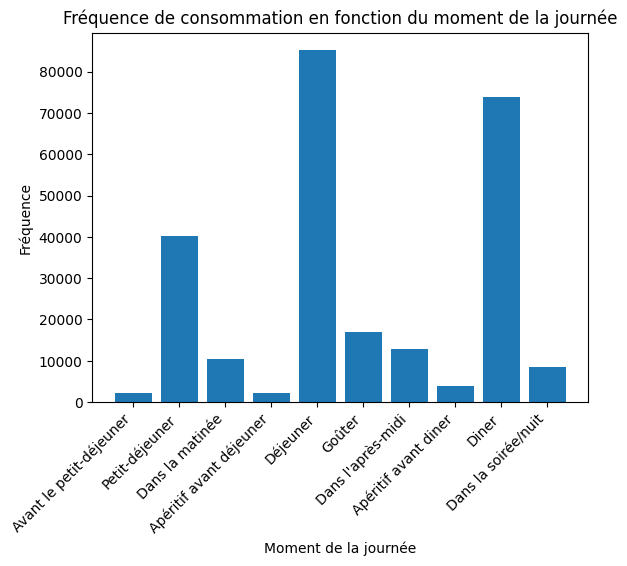

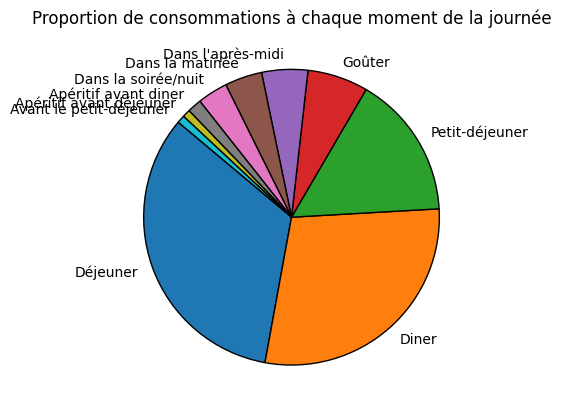

In [4]:
frequencies = df['occ_type'].value_counts()
n=df['occ_type'].count()
labels = {
    1: "Avant le petit-déjeuner",
    2: "Petit-déjeuner",
    3: "Dans la matinée",
    4: "Apéritif avant déjeuner",
    5: "Déjeuner",
    6: "Goûter",
    7: "Dans l'après-midi",
    8: "Apéritif avant diner",
    9: "Diner",
    10:"Dans la soirée/nuit"
}


# Tracer l'histogramme
plt.bar(frequencies.index, frequencies.values)
plt.xlabel('Moment de la journée')
plt.ylabel('Fréquence')
plt.title('Fréquence de consommation en fonction du moment de la journée')
plt.xticks(frequencies.index, [labels[x] for x in frequencies.index], rotation=45, ha="right")
plt.show()

# Tracer le diagramme circulaire
value_counts = df['occ_type'].value_counts()
custom_labels = [labels[x] for x in frequencies.index]
plt.pie(value_counts, labels=custom_labels, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title(f"Proportion de consommations à chaque moment de la journée")  
plt.show()




On voit donc qu'une majorité des consommations enregistrées pour cette étude concernent de vrais repas : petit déjeuner, déjeuner, dîner (plus de 80% des consommations). Il y a aussi des collations à des moments plus variés comme le goûter ou encore une collation entre deux repas.
De façon précise, à quels horaires mangent les consommateurs ?


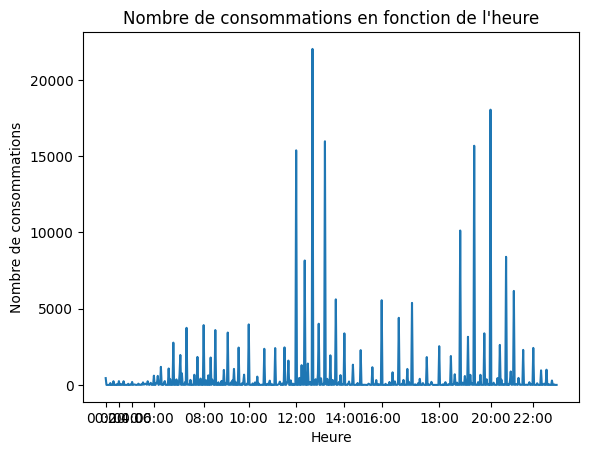

In [5]:
frequencies = df['occ_hdeb'].value_counts().sort_index()
plt.plot(frequencies.index,frequencies.values)
xticks_to_display = ['00:00','02:00','04:00','06:00','08:00','10:00','12:00','14:00','16:00','18:00','20:00','22:00']
plt.xticks(xticks_to_display)
plt.xlabel('Heure')
plt.ylabel('Nombre de consommations')
plt.title("Nombre de consommations en fonction de l'heure")
plt.show()


On reconnaît les trois pics précédemment évoqués, même si celui pour le petit-déjeuner est plus faible.
Le petit-déjeuner s'étale entre 7h et 10h de façon à peu preès uniforme. 
En ce qui concerne le déjeuner, il a lieu entre midi et 14h, avec un pic de fréquence aux alentours de 13h.
Le goûter a lieu entre 16h et 17h comme le montre la légère augmentation à ces horaires. Enfin, le dîner a lieu entre 19h et 21h principalement, avec un pic à 20h.

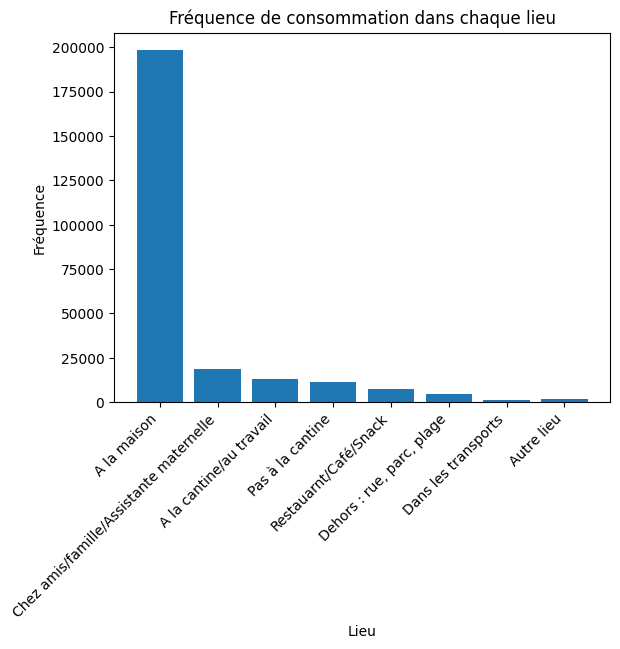

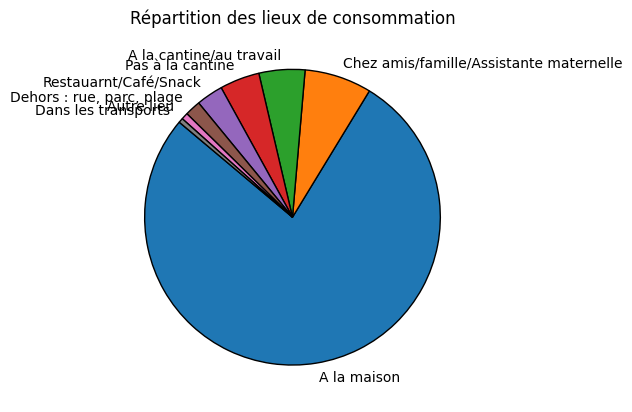

In [6]:
frequencies = df['occ_lieu'].value_counts()
labels = {
    1: "A la maison",
    2: "Chez amis/famille/Assistante maternelle",
    3: "A la cantine/au travail",
    4: "Pas à la cantine",
    5: "Restauarnt/Café/Snack",
    6: "Dehors : rue, parc, plage",
    7: "Dans les transports",
    8: "Autre lieu",

}


# Tracer l'histogramme
plt.bar(frequencies.index, frequencies.values)
plt.xlabel('Lieu')
plt.ylabel('Fréquence')
plt.title('Fréquence de consommation dans chaque lieu')
plt.xticks(frequencies.index, [labels[x] for x in frequencies.index], rotation=45, ha="right")
plt.show()

#Tracer le diagramme circulaire
value_counts = df['occ_lieu'].value_counts()
custom_labels = [labels[x] for x in frequencies.index]
plt.pie(value_counts, labels=custom_labels, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title(f"Répartition des lieux de consommation")  
plt.show()

Cette analyse nous montre que la grande majorité des repas sont consommés à la maison par les utilisateurs. Il arrive en deuxième position une catégorie "invités" : la famille, les amis et l'assistante maternelle pour les plus jeunes. Viennent ensuite les repas pris à la cantine où au travail (qui restent encore une fois minoritaires). Les autres catégories sont négligeables.

2. <b>Habitudes de consommation</b>

Un autre marqueur de consommation qu'il peut être intéressant de regarder est les habitudes de consommations des utilisateurs : les produits consommés sont-ils issus de l'agriculture biologique ? Sont-ils enrichis ?

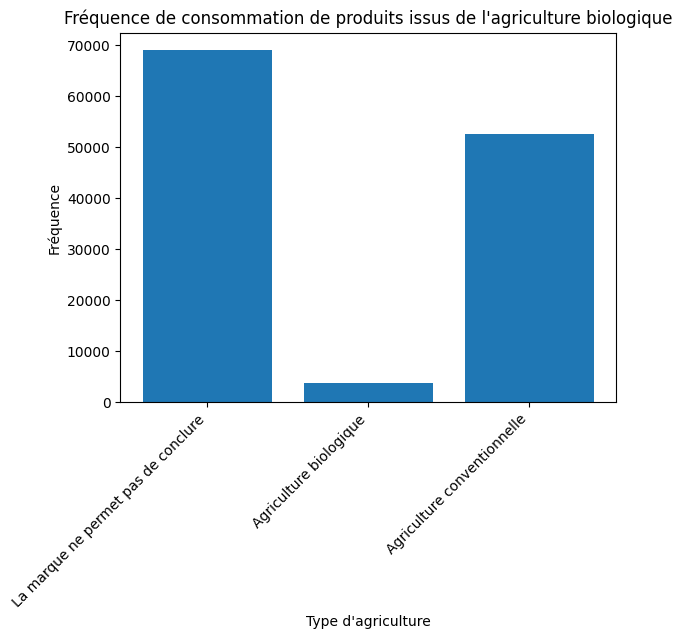

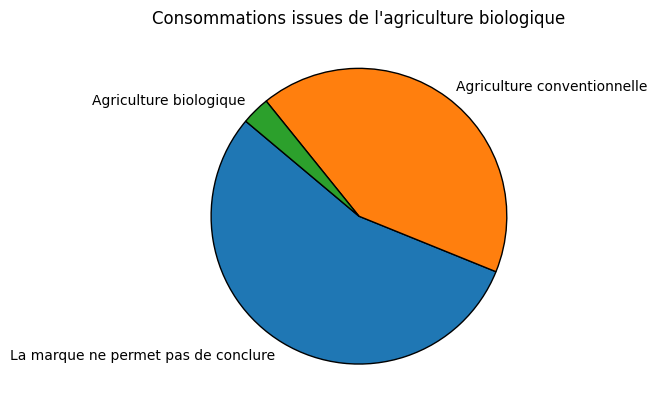

In [4]:
frequencies = df['aliment_marque_bio'].value_counts()
labels = {
    0: "La marque ne permet pas de conclure",
    1: "Agriculture biologique",
    2: "Agriculture conventionnelle",
}


# Tracer l'histogramme
plt.bar(frequencies.index, frequencies.values)
plt.xlabel("Type d'agriculture")
plt.ylabel("Fréquence")
plt.title("Fréquence de consommation de produits issus de l'agriculture biologique")
plt.xticks(frequencies.index, [labels[x] for x in frequencies.index], rotation=45, ha="right")
plt.show()

#Tracer le diagramme circulaire
value_counts = df['aliment_marque_bio'].value_counts()
custom_labels = [labels[x] for x in frequencies.index]
plt.pie(value_counts, labels=custom_labels, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title(f"Consommations issues de l'agriculture biologique")  
plt.show()

Sur plus de la moitié des produits, il est impossible de déterminer si le produit est oui ou non issu de l'agriculture biologique. En revanche, si les données de la marque sont suffisantes pour conclure, seule une très faible partie des consommations sont bio. Cela peut s'expliquer pour des raisons économiques, le bio étant souvent plus onéreux. 

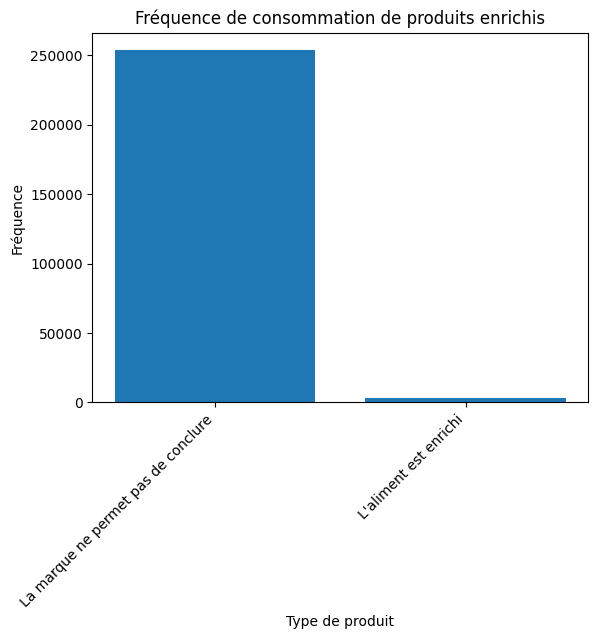

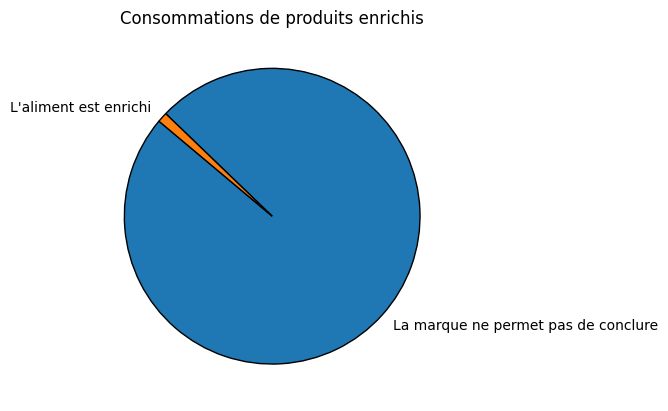

In [6]:
df['aliment_marque_enrichi'] = df['aliment_marque_enrichi'].fillna(0)

frequencies = df['aliment_marque_enrichi'].value_counts()
labels = {
    0: "La marque ne permet pas de conclure",
    1: "L'aliment est enrichi",
}



# Tracer l'histogramme
plt.bar(frequencies.index, frequencies.values)
plt.xlabel("Type de produit")
plt.ylabel("Fréquence")
plt.title("Fréquence de consommation de produits enrichis")
plt.xticks(frequencies.index, [labels[x] for x in frequencies.index], rotation=45, ha="right")
plt.show()

#Tracer le diagramme circulaire
value_counts = df['aliment_marque_enrichi'].value_counts()
custom_labels = [labels[x] for x in frequencies.index]
plt.pie(value_counts, labels=custom_labels, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title(f"Consommations de produits enrichis")  
plt.show()

Nonobstant le fait que très peu de données de cette catégorie sont propices à l'interprétation, très peu de produits consommés par nos utilisateurs sont enrichis, ce qui est une bonne chose car les aliments enrichis sont souvent riches en sucres, en graisses, en sodium et en d'autres ingrédients qui peuvent entraîner des problèmes comme l'obésité.